In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Load cleaned_movies into DataFrame
movies_df = pd.read_csv('movies_final.csv')
#movies_df.head()

In [3]:
# Drop Unnamed column
movies_df = movies_df.loc[:,~movies_df.columns.str.contains('^Unnamed')]
#movies_df.head()

# Categorical Variable Function

## Dataframe Adjustments

### Adjust Count

In [35]:
#Recommended column value counts descriptive stats to determine count parameters
#print(movies_df['genre'].value_counts().describe())
#movies_df['genre'].value_counts().to_frame().boxplot(vert=False)

In [12]:
#Categorical variable reduction by value_count.  Uses movies_df dataframe  
#Insert 1. 'column' in quotes 2. minimum movie apperances (inclusive) 3. maximum movie apperances (inclusive)
#Returns a dataframe
def reduce_df_count(column, min, max):
    df = movies_df[movies_df[column].map(movies_df[column].value_counts()) >= movies_df['genre'].value_counts().quantile(min)]
    df = df[df[column].map(df[column].value_counts()) <= movies_df['genre'].value_counts().quantile(max)]
    return df

In [6]:
#Categorical variable reduction by median_rating.  Uses movies_df dataframe  
#Insert 1. 'column' in quotes 2. minimum movie apperances (inclusive) 3. maximum movie apperances (inclusive)
#Returns a dataframe
def reduce_df_median(column, min, max):
    column_medians = movies_df.groupby([column]).median()['score']
    df = movies_df[movies_df[column].map(movies_df.groupby([column]).median()['score']) >= column_medians.quantile(min)]
    df = df[df[column].map(df[column].value_counts()) <= column_medians.quantile(max)]
    return df

### Count ordered

In [7]:
#insert dataframe and 'column' in quote
def cat_count(df, column):   
    #Column values and column value counts
    column_counts = df[column].value_counts()
    #Put column counts in a dataframe
    column_counts_df = pd.DataFrame(column_counts).rename(columns={column: "Count"})
    #Put the values in a list
    column_values_list = column_counts.index.to_list()
    
    #Get scores by column value
    value_scores = []
    for value in column_values_list:
        value_df = df.loc[df[column] == value]
        value_score = value_df['score'].to_list()
        value_scores.append(value_score)
    
    #Bargraph of column counts
    length = len(column_values_list)
    width = column_counts_df['Count'].max()
    column_bar = column_counts_df.plot.barh(figsize = (15, length * .5))
    column_bar.set_title(f"Number of Movies by {column}",fontsize=20)
    column_bar.set_xlabel("Count",fontsize=14)
    column_bar.set_ylabel(f"{column}",fontsize=14) 
    column_bar.legend(loc = 'lower right')
    plt.gca().invert_yaxis()

    #Add counts to bar graph
    for i, v in enumerate(column_counts):
        column_bar.text(v + 3, i + .25, str(v),
            color = 'black', fontweight = 'bold')
    
    plt.show()
    
    #Box plot for values and and value scores
    y_labels = column_values_list
    x_values = value_scores
    fig, ax = plt.subplots(figsize=(10, length * .3 ))
    ax.set_title(f'Score by {column}', fontsize=20)
    ax.set_xlabel("Scores", fontsize=14)
    ax.set_ylabel(column, fontsize=14)
    ax.boxplot(x_values, labels=y_labels, vert=False)
    plt.gca().invert_yaxis()
    ax.grid()
    # Save the figure.

    plt.show()
    
    print(movies_df.groupby([column]).mean()['score'].describe())

## Ordered by Median

### Median Dataframe Adjustment

In [9]:
#insert dataframe and 'column' in quote
def cat_median(df, column):   
    #Column values and column value counts
    column_counts = df[column].value_counts()
    #Put column counts in a dataframe
    column_counts_df = pd.DataFrame(column_counts).rename(columns={column: "Count"})
    column_counts_df = column_counts_df.reset_index()
    #Get Medians
    median_df = df.groupby([column]).median()[['score']]

    #Merge
    merged_df = column_counts_df.merge(median_df, left_on='index', right_on=f'{column}')
    sorted_df = merged_df.sort_values(by='score')
    final_df = sorted_df.set_index('index')

    #Put the values in a list
    column_values_list = final_df.index.to_list()

    #Get scores by column value
    value_scores = []
    for value in column_values_list:
        value_df = df.loc[df[column] == value]
        value_score = value_df['score'].to_list()
        value_scores.append(value_score)

    #Bargraph of column counts
    length = len(column_values_list)
    column_bar = final_df[['Count']].plot.barh(figsize = (15, length * .5))
    column_bar.set_title(f"Number of Movies by {column}",fontsize=20)
    column_bar.set_xlabel("Count",fontsize=14)
    column_bar.set_ylabel(f"{column}",fontsize=14) 
    column_bar.legend(loc = 'lower right')

    #Add counts to bar graph
    for i, v in enumerate(sorted_df['Count']):
        column_bar.text(v + 3, i + .25, str(v),
            color = 'black', fontweight = 'bold')

    plt.show()

    #Box plot for values and and value scores
    y_labels = column_values_list
    x_values = value_scores
    fig, ax = plt.subplots(figsize=(10, length * .3 ))
    ax.set_title(f'Score by {column}', fontsize=20)
    ax.set_xlabel("Scores", fontsize=14)
    ax.set_ylabel(column, fontsize=14)
    ax.boxplot(x_values, labels=y_labels, vert=False)
    ax.grid()
    # Save the figure.

    plt.show()

    print(df.groupby([column]).mean()['score'].describe())

## Numeric Variable Function

In [10]:
#insert 1. dataframe 2. 'column' in quotes 3/4. min/max display quantile in decimals (ex: .xx) 
def num_desc(df, column, x_min, x_max):
    print(df[column].describe())
    
    # Create a box-and-whisker plot for the urban cities ride count.
    fig, ax = plt.subplots()
    ax.boxplot(movies_df[column], labels=[""],vert=False)
    # Add the title, y-axis label and grid.
    ax.set_title(column, fontsize=20)
    ax.set_xlabel('Movie length (min)')
    ax.set_xlim(df[column].quantile(x_min), df[column].quantile(x_max))
    
    ax.grid()
    plt.show()
    
    # Plot actual vs. predicted rating
    fig, ax = plt.subplots(figsize=(10, 13))
    ax.scatter(movies_df[column], movies_df['score'],)
    ax.set_xlim(df[column].quantile(x_min), df[column].quantile(x_max))
    plt.title(f'{column} versus Score',fontsize=20)
    ax.set_xlabel(column, fontsize=14)
    ax.set_ylabel('Scores', fontsize=14)

    ax.grid()
    plt.show()

# Functions

In [ ]:
###Summary of functions
##Categofical Descritive Stats Ordered by Count
#new_df = reduce_df_count(column, count_min, count_max)
#cat_count(df, column)

##Categorical Descriptive Stats Ordered by Median
#new_df = reduce_df_median(column, percentile_min, percentile_max)
#cat_median(df, column)

##Numeric Descriptive stats
#num_desc(df, column, percentile_min, percentile_max)

# Analysis

### Ratings

In [2]:
#num_desc(movies_df, 'score', .00, .999) 

### Star

In [13]:
#cat_desc(stars_df, 'star')

### Categorical Count

In [15]:
new_df = reduce_df_count('star', 2, 999)

In [16]:
new_df['score'].describe()

count   5,778.00
mean        6.42
std         0.90
min         1.90
25%         5.90
50%         6.50
75%         7.00
max         9.30
Name: score, dtype: float64

### Categorical Median

In [23]:
new_df = reduce_df_median('genre', 0, 1.0)

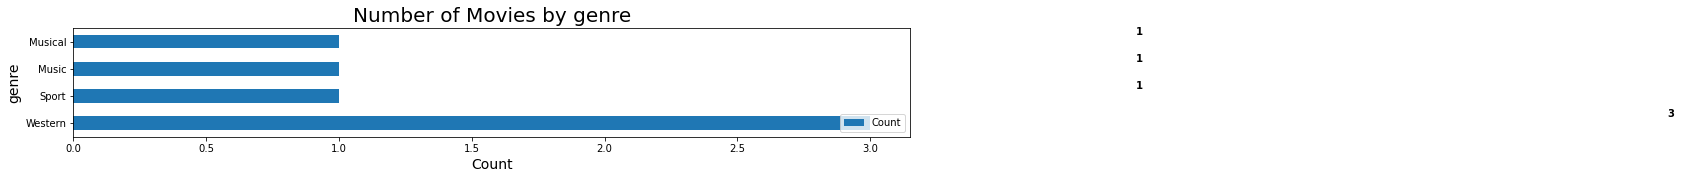

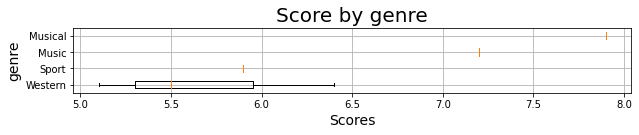

count   4.00
mean    6.67
std     1.06
min     5.67
25%     5.84
50%     6.55
75%     7.38
max     7.90
Name: score, dtype: float64


In [24]:
cat_median(new_df, 'genre')